In [1]:
import numpy as np
import math
import sys

##################### definitions

def initialize_counts_dic(max_number_tRNAs_in_TU):
	#initialize the "internal" dict counts per tRNA
	count_dic={}
	for ii in xrange(max_number_tRNAs_in_TU + 1):
		count_dic[ ii ] = 0
	return count_dic

def tRNA_called_counts_initialize(tRNAinEc, tRNA_tags):
	#initialize the dict counts for all tRNA
	tRNA_called_counts={}
	for tRNAi in xrange( tRNAinEc ):
		tRNA_called_counts[ tRNA_tags[tRNAi] ] = initialize_counts_dic(max_number_tRNAs_in_TU)
	return tRNA_called_counts

def codons_counts_initialize(codonsinEc, codons_Ec, max_number_tRNAs_in_TU):
	#initialize the dict counts for all tRNA
	codons_counts={}
	for codonsi in xrange( codonsinEc ):
		codons_counts[ codons_Ec[codonsi] ] = initialize_counts_dic(max_number_tRNAs_in_TU)
	return codons_counts

def tRNAs_in_TUi_dic(tRNAinEc, tRNA_tags, TransUnits_row ):
	tRNAs_in_TUi={}
	for tRNAi in xrange(tRNAinEc):
		tRNAs_in_TUi[ tRNA_tags[ tRNAi ] ] = TransUnits_row[tRNAi]
	return tRNAs_in_TUi

def flatten(dummy): 
	#eliminates ione set of square brackets in an array e.g. [[1,2]] -> [1,2]
	dummy = [val for sublist in dummy for val in sublist]
	return dummy

def rib_call_tRNAs(codons_Ec,pcodons_Ec):
	codon_called = np.random.choice(codons_Ec, 1, p=pcodons_Ec)[0]
	tRNA_called = codon_dict[codon_called]
	return (tRNA_called,codon_called)

def add_codon(codon_called,codons_total_counts):
	codons_total_counts[codon_called]+=1
	return codons_total_counts

def create_dic_tRNA_total_counts(tRNAinEc, tRNA_tags ): 
	tRNA_total_counts = {}
	for i in xrange(tRNAinEc): #to account for the events either be 0 through 42
		tRNA_total_counts[ tRNA_tags[i] ] = 0
	return tRNA_total_counts
	
def create_dic_codons_total_counts(codonsinEc, codons_Ec): 
	codons_total_counts = {}
	for i in xrange(codonsinEc): 
		codons_total_counts[ codons_Ec[i] ] = 0
	return codons_total_counts

def assign_tRNA_counts(tRNA_called, tRNAs_in_TUi, max_number_tRNAs_in_TU, codon_called, counts, tRNA_total_counts ):
# 	print len( tRNA_called )
	dummy = 0
	for kk in xrange( len( tRNA_called ) ):
# 		print tRNA_called[kk]
# 		print
		if ((tRNA_called[kk] != 'Gly1') and (tRNA_called[kk] != 'Ile2')):
			if (tRNAs_in_TUi[ tRNA_called[kk] ] <= max_number_tRNAs_in_TU) :
				tRNA_total_counts[ tRNA_called[kk]  ] += 1
				counts['tRNAc'][ tRNA_called[kk] ][ tRNAs_in_TUi[ tRNA_called[kk] ] ] += 1
				dummy += tRNAs_in_TUi[ tRNA_called[kk] ]
			else:
				print 'the max_number_tRNAs_in_TU exceeded :', max_number_tRNAs_in_TU
				print tRNA_called[kk], " = ", tRNAs_in_TUi[ tRNA_called[kk] ]
				sys.exit()
# 	print dummy
	counts['codonsc'][codon_called][dummy] +=1
	return (counts, tRNA_total_counts)
# 	counts['tRNAc'][ tRNA_called[kk] ][ tRNAs_in_TUi[ tRNA_called[kk] ] ]


def create_dic(tRNAperTU): 
	prob_dic = {}
	for i in xrange(tRNAperTU + 1): #to account for the events either be 0 through 42
		prob_dic[i] = 0
	return prob_dic

def get_tRNA_prob(prob_dic,tRNAperTU, TU, TransUnits,jj):
	for i in xrange(TU):
		prob_dic[ TransUnits[i][jj] ] += 1
	
	for i in xrange(tRNAperTU +1):
		prob_dic[i] /= TU*1.
	return prob_dic

def create_dic_tRNA_elong_speed(tRNAinEc,tRNA_tags): 
	tRNA_elong_speed = {}
	for i in xrange(tRNAinEc): #to account for the events either be 0 through 42
		tRNA_elong_speed[ tRNA_tags[i] ] = 0
	return tRNA_elong_speed

#####################



SyntaxError: Missing parentheses in call to 'print'. Did you mean print('the max_number_tRNAs_in_TU exceeded :', max_number_tRNAs_in_TU)? (<ipython-input-1-e742a5365f53>, line 72)

In [2]:
######################input simulation data
ptRNA = [0.0521, 0.0099, 0.0762, 0.0102, 0.0139, 0.0067, 0.0191, 0.0384, 0.0255, 0.0123, 0.0141,\
 0.0757, 0.0343, 0.0699, 0.0102, 0.0557, 0.0717, 0.0151, 0.0107, 0.0307, \
 0.0165, 0.0309, 0.0113, 0.0166, 0.0144, 0.0115, 0.0093, 0.0035, 0.0208, 0.0055, 0.0226, \
 0.0123, 0.0017, 0.0087, 0.0176, 0.0147, 0.0151, 0.0326, 0.0616,0.0203]
 
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]

codons_Ec = ["GGG", "GGA", "GGU", "GGC", "GAG", "GAA", "GAU", "GAC", "GUG", "GUA", "GUU", \
"GUC", "GCG", "GCA", "GCU", "GCC", "AGG", "AGA", "AGU", "AGC", "AAG", "AAA", \
"AAU", "AAC", "AUG", "AUA", "AUU", "AUC", "ACG", "ACA", "ACU", "ACC", "UGG", \
"UGA", "UGU", "UGC", "UAU", "UAC", "UUG", "UUA", "UUU", "UUC", "UCG", "UCA", \
"UCU", "UCC", "CGG", "CGA", "CGU", "CGC", "CAG", "CAA", "CAU", "CAC", "CUG", \
"CUA", "CUU", "CUC", "CCG", "CCA", "CCU", "CCC"]

pcodons_Ec =[0.00483, 0.00272, 0.03847, 0.03579, 0.01665, 0.05335, 0.02436, \
0.02885, 0.02150, 0.01594, 0.03146, 0.01130, 0.03047, 0.02223, \
0.02898, 0.01989, 0.00009, 0.00113, 0.00401, 0.01203, 0.01214, \
0.04464, 0.00984, 0.02808, 0.02247, 0.00093, 0.02148, 0.03685, \
0.00757, 0.00350, 0.01394, 0.02663, 0.00981, 0.00031, 0.00425, \
0.00531, 0.01073, 0.01628, 0.00666, 0.00616, 0.01261, 0.02279, \
0.00608, 0.00391, 0.01318, 0.01120, 0.00176, 0.00133, 0.03126, \
0.02235, 0.02938, 0.01024, 0.00927, 0.01396, 0.06041, 0.00216, \
0.00573, 0.00622, 0.02965, 0.00655, 0.00501, 0.00332]

codon_dict={'GGG': ['Gly1','Gly2'], 'GGA': ['Gly2'], 'GGU': ['Gly3'], 'GGC': ['Gly3'], \
'GAG': ['Glu2'], 'GAA': ['Glu2'], 'GAU': ['Asp1'], 'GAC': ['Asp1'], \
'GUG': ['Val1'], 'GUA': ['Val1'], 'GUU': ['Val1','Val2ApB'], \
'GUC': ['Val2ApB'], 'GCG': ['Ala1B'], 'GCA': ['Ala1B'], 'GCU': ['Ala1B'], \
'GCC': ['Ala2'], 'AGG': ['Arg5'], 'AGA': ['Arg4'], 'AGU': ['Ser3'], \
'AGC': ['Ser3'], 'AAG': ['Lys'], 'AAA': ['Lys'], 'AAU': ['Asn'], \
'AAC': ['Asn'], 'AUG': ['Met_m'], 'AUA': ['Ile2'], 'AUU': ['Ile1'], \
'AUC': ['Ile1'], 'ACG': ['Thr2','Thr4'], 'ACA': ['Thr4'], \
'ACU': ['Thr1','Thr4','Thr3'], 'ACC': ['Thr3','Thr1'], \
'UGG': ['Trp'], 'UGA': ['Sel_Cys'], 'UGU': ['Cys'], 'UGC': ['Cys'], \
'UAU': ['Tyr1pTyr2'], 'UAC': ['Tyr1pTyr2'], 'UUG': ['Leu5','Leu4'], \
'UUA': ['Leu5'], 'UUU': ['Phe'], 'UUC': ['Phe'], 'UCG': ['Ser1','Ser2'], \
'UCA': ['Ser1'], 'UCU': ['Ser5','Ser1'], 'UCC': ['Ser5'], 'CGG': ['Arg3'], \
'CGA': ['Arg2'], 'CGU': ['Arg2'], 'CGC': ['Arg2'], 'CAG': ['Gln2'], \
'CAA': ['Gln1'], 'CAU': ['His'], 'CAC': ['His'], 'CUG': ['Leu1','Leu3'], \
'CUA': ['Leu3'], 'CUU': ['Leu2'], 'CUC': ['Leu2'], 'CCG': ['Pro1','Pro3'], \
'CCA': ['Pro3'], 'CCU': ['Pro2','Pro3'], 'CCC': ['Pro2']}

TU = 9500 #translation units

# mRNa_codons = 100 # of codons that make up the "mRNA" strand to be decoded per ribosome

tRNAperTU = 42

max_number_tRNAs_in_TU = tRNAperTU

total_cells = 2000


#####################


# some definitions

tRNAEc_dic ={} #stores the tRNA probability distribution per TU ( 0:0.35, 1:0.38 --> 35% of the times there won't be tRNA in a TU)


if len(tRNA_tags) == len(ptRNA):
	tRNAinEc = len(tRNA_tags)
	TransUnits =[]
	
if len(codons_Ec) == len(pcodons_Ec):
	codonsinEc = len(codons_Ec)
	
#initialize the dic thta will store the tRNA counts	as per ribosome requests
tRNA_called_counts = tRNA_called_counts_initialize(tRNAinEc, tRNA_tags)
tRNA_total_counts = create_dic_tRNA_total_counts(tRNAinEc, tRNA_tags)
tRNA_elong_speed = create_dic_tRNA_elong_speed(tRNAinEc,tRNA_tags)
codon_elong_speed = create_dic_tRNA_elong_speed(codonsinEc,codons_Ec)
codons_total_counts = create_dic_codons_total_counts(codonsinEc, codons_Ec)
codons_counts = codons_counts_initialize(codonsinEc, codons_Ec, max_number_tRNAs_in_TU)
tRNA_prob_null = create_dic_tRNA_elong_speed(tRNAinEc,tRNA_tags)
codon_prob_null = create_dic_tRNA_elong_speed(codonsinEc,codons_Ec)

counts = {}
counts['tRNAc'] = tRNA_called_counts
counts['codonsc'] = codons_counts

elong_speed_tRNA = 0.0
trna_null = 0.0
elong_speed = 0.0
codon_null = 0.0
# 
# print counts
# sys.exit()

for celli in xrange(total_cells):
	# Array of TU x len(ptRNA), that generates TU samples each with tRNAperTU, and assigns the
	# occurrence of each tRNA to the bin TransUnits[TU#,tRNA]
	for TUi in xrange(TU):
		TransUnits.append( flatten( np.random.multinomial( tRNAperTU, ptRNA, size = 1) ) )

	for TUi in xrange(TU*(celli), TU*(celli+1)):
		#create a dic for the specific tRNAs available per TUi
		tRNAs_in_TUi = tRNAs_in_TUi_dic(tRNAinEc, tRNA_tags, TransUnits[TUi] )

		tRNA_called, codon_called = rib_call_tRNAs(codons_Ec,pcodons_Ec)

		codons_total_counts = add_codon(codon_called,codons_total_counts)

		counts, tRNA_total_counts = assign_tRNA_counts(tRNA_called, tRNAs_in_TUi, max_number_tRNAs_in_TU, codon_called, counts, tRNA_total_counts )



for tRNAi in xrange(tRNAinEc):
	for jj in xrange(max_number_tRNAs_in_TU +1):
		if ( tRNA_total_counts[ tRNA_tags[ tRNAi ] ] !=0 ):
			counts['tRNAc'][ tRNA_tags[ tRNAi ] ][jj] /= tRNA_total_counts[ tRNA_tags[ tRNAi ] ]*1.
			if ( jj != 0 ):
				tRNA_elong_speed[ tRNA_tags[ tRNAi ] ] += counts['tRNAc'][ tRNA_tags[ tRNAi ] ][jj] * 75.0 / jj
			else:
				tRNA_prob_null[ tRNA_tags[ tRNAi ] ] = counts['tRNAc'][ tRNA_tags[ tRNAi ] ][jj] 
				
for codoni in xrange(codonsinEc):
	for jj in xrange(max_number_tRNAs_in_TU +1):
		if ( codons_total_counts[ codons_Ec[ codoni ] ] !=0 ):
			counts['codonsc'][ codons_Ec[ codoni ] ][jj] /= codons_total_counts[  codons_Ec[ codoni ] ]*1.
			if ( jj != 0 ):
				codon_elong_speed[ codons_Ec[ codoni ] ] += counts['codonsc'][ codons_Ec[ codoni ] ][jj] * 75.0 / jj
			else:
				codon_prob_null[ codons_Ec[ codoni ] ] = counts['codonsc'][ codons_Ec[ codoni ] ][jj]
				
for tRNAi in xrange(tRNAinEc):
	elong_speed_tRNA += tRNA_elong_speed[ tRNA_tags[ tRNAi ] ] * ptRNA[tRNAi]
	trna_null += tRNA_prob_null[ tRNA_tags[ tRNAi ] ] * ptRNA[tRNAi]
	
for codoni in xrange( codonsinEc ):
	elong_speed += codon_elong_speed[ codons_Ec[ codoni ] ] * pcodons_Ec[codoni]
	codon_null+= codon_prob_null[ codons_Ec[ codoni ] ] * pcodons_Ec[codoni]
# 	print codons_Ec[ codoni ] , pcodons_Ec[codoni]

# print counts['tRNAc']
# print 
# print counts['codonsc']
# print
print tRNA_elong_speed
print
print codon_elong_speed
print	

# print tRNA_called_counts
# print
# print tRNA_elong_speed
print "elong_speed", elong_speed
print "elong_speed_trna", elong_speed_tRNA
print
print "codon_null", codon_null
print "trna_null", trna_null
print
print "tRNA prob of no tRNA in TU when called: "
print tRNA_prob_null
print
print "codon prob of no tRNA in TU when called: "
print codon_prob_null

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(tRNA_elong_speed)? (<ipython-input-2-223151822490>, line 144)

In [145]:
pcodon_dict

{'Ala1B': 0.0521,
 'Ala2': 0.0099,
 'Arg2': 0.0762,
 'Arg3': 0.0102,
 'Arg4': 0.0139,
 'Arg5': 0.0067,
 'Asn': 0.0191,
 'Asp1': 0.0384,
 'Cys': 0.0255,
 'Gln1': 0.0123,
 'Gln2': 0.0141,
 'Glu2': 0.0757,
 'Gly2': 0.0343,
 'Gly3': 0.0699,
 'His': 0.0102,
 'Ile1': 0.0557,
 'Leu1': 0.0717,
 'Leu2': 0.0151,
 'Leu3': 0.0107,
 'Leu4': 0.0307,
 'Leu5': 0.0165,
 'Lys': 0.0309,
 'Met_m': 0.0113,
 'Phe': 0.0166,
 'Pro1': 0.0144,
 'Pro2': 0.0115,
 'Pro3': 0.0093,
 'Sel_Cys': 0.0035,
 'Ser1': 0.0208,
 'Ser2': 0.0055,
 'Ser3': 0.0226,
 'Ser5': 0.0123,
 'Thr1': 0.0017,
 'Thr2': 0.0087,
 'Thr3': 0.0176,
 'Thr4': 0.0147,
 'Trp': 0.0151,
 'Tyr1pTyr2': 0.0326,
 'Val1': 0.0616,
 'Val2ApB': 0.0203}

In [4]:
import numpy as np

ptRNA = [0.0521, 0.0099, 0.0762, 0.0102, 0.0139, 0.0067, 0.0191, 0.0384, 0.0255, 0.0123, 0.0141,\
 0.0757, 0.0343, 0.0699, 0.0102, 0.0557, 0.0717, 0.0151, 0.0107, 0.0307, \
 0.0165, 0.0309, 0.0113, 0.0166, 0.0144, 0.0115, 0.0093, 0.0035, 0.0208, 0.0055, 0.0226, \
 0.0123, 0.0017, 0.0087, 0.0176, 0.0147, 0.0151, 0.0326, 0.0616,0.0203]
ptRNA = np.divide(ptRNA,sum(ptRNA))

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]

ptRNA_dict = dict(zip(tRNA_tags, ptRNA))

codons_Ec = ["GGG", "GGA", "GGU", "GGC", "GAG", "GAA", "GAU", "GAC", "GUG", "GUA", "GUU", \
"GUC", "GCG", "GCA", "GCU", "GCC", "AGG", "AGA", "AGU", "AGC", "AAG", "AAA", \
"AAU", "AAC", "AUG", "AUA", "AUU", "AUC", "ACG", "ACA", "ACU", "ACC", "UGG", \
"UGA", "UGU", "UGC", "UAU", "UAC", "UUG", "UUA", "UUU", "UUC", "UCG", "UCA", \
"UCU", "UCC", "CGG", "CGA", "CGU", "CGC", "CAG", "CAA", "CAU", "CAC", "CUG", \
"CUA", "CUU", "CUC", "CCG", "CCA", "CCU", "CCC"]

pcodons_Ec =[0.00483, 0.00272, 0.03847, 0.03579, 0.01665, 0.05335, 0.02436, \
0.02885, 0.02150, 0.01594, 0.03146, 0.01130, 0.03047, 0.02223, \
0.02898, 0.01989, 0.00009, 0.00113, 0.00401, 0.01203, 0.01214, \
0.04464, 0.00984, 0.02808, 0.02247, 0.00093, 0.02148, 0.03685, \
0.00757, 0.00350, 0.01394, 0.02663, 0.00981, 0.00031, 0.00425, \
0.00531, 0.01073, 0.01628, 0.00666, 0.00616, 0.01261, 0.02279, \
0.00608, 0.00391, 0.01318, 0.01120, 0.00176, 0.00133, 0.03126, \
0.02235, 0.02938, 0.01024, 0.00927, 0.01396, 0.06041, 0.00216, \
0.00573, 0.00622, 0.02965, 0.00655, 0.00501, 0.00332]
pcodons_Ec = np.divide(pcodons_Ec,sum(pcodons_Ec))

pcodon_dict = dict(zip(codons_Ec, pcodons_Ec))

codon_dict={'GGG': ['Gly2'], 'GGA': ['Gly2'], 'GGU': ['Gly3'], 'GGC': ['Gly3'], \
'GAG': ['Glu2'], 'GAA': ['Glu2'], 'GAU': ['Asp1'], 'GAC': ['Asp1'], \
'GUG': ['Val1'], 'GUA': ['Val1'], 'GUU': ['Val1','Val2ApB'], \
'GUC': ['Val2ApB'], 'GCG': ['Ala1B'], 'GCA': ['Ala1B'], 'GCU': ['Ala1B'], \
'GCC': ['Ala2'], 'AGG': ['Arg5'], 'AGA': ['Arg4'], 'AGU': ['Ser3'], \
'AGC': ['Ser3'], 'AAG': ['Lys'], 'AAA': ['Lys'], 'AAU': ['Asn'], \
'AAC': ['Asn'], 'AUG': ['Met_m'], 'AUA': [], 'AUU': ['Ile1'], \
'AUC': ['Ile1'], 'ACG': ['Thr2','Thr4'], 'ACA': ['Thr4'], \
'ACU': ['Thr1','Thr4','Thr3'], 'ACC': ['Thr3','Thr1'], \
'UGG': ['Trp'], 'UGA': ['Sel_Cys'], 'UGU': ['Cys'], 'UGC': ['Cys'], \
'UAU': ['Tyr1pTyr2'], 'UAC': ['Tyr1pTyr2'], 'UUG': ['Leu5','Leu4'], \
'UUA': ['Leu5'], 'UUU': ['Phe'], 'UUC': ['Phe'], 'UCG': ['Ser1','Ser2'], \
'UCA': ['Ser1'], 'UCU': ['Ser5','Ser1'], 'UCC': ['Ser5'], 'CGG': ['Arg3'], \
'CGA': ['Arg2'], 'CGU': ['Arg2'], 'CGC': ['Arg2'], 'CAG': ['Gln2'], \
'CAA': ['Gln1'], 'CAU': ['His'], 'CAC': ['His'], 'CUG': ['Leu1','Leu3'], \
'CUA': ['Leu3'], 'CUU': ['Leu2'], 'CUC': ['Leu2'], 'CCG': ['Pro1','Pro3'], \
'CCA': ['Pro3'], 'CCU': ['Pro2','Pro3'], 'CCC': ['Pro2']}

In [5]:
cells = 1
TU = 9500*20
time = 26.2
tRNA_distrib_arr = list()
codon_count = {}
codon_time = {}
codon_time_avg = {}
codon_time_weighted_avg={}
p_codon_tRNA = {}

for key in codon_dict:
    codon_count[key] = []
    codon_time[key] = []
    codon_time_avg[key] = []
    codon_time_weighted_avg[key]=[]
    p_codon_tRNA[key] = []
    
for codon in codon_dict:
    p_codon_tRNA_i = 0
    for tRNA in codon_dict[codon]:
        p_codon_tRNA_i += ptRNA_dict[tRNA]
    p_codon_tRNA[codon].append(p_codon_tRNA_i)
#Ala1B = []
#Ala2 = []
for cell in range(cells):
    for i in range(TU):
        tRNA_vox = list(np.random.choice(tRNA_tags,42,p=ptRNA))
        #Ala1B.append(tRNA_vox.count('Ala1B'))
        #Ala2.append(tRNA_vox.count('Ala2'))

        codon_vox = np.random.choice(codons_Ec, 1, p=pcodons_Ec)
        #print(codon_dict[codon_vox[0]])
        codon_count_i = 0
        for tRNA in codon_dict[codon_vox[0]]:
            codon_count_i += tRNA_vox.count(tRNA)
        codon_count[codon_vox[0]].append(codon_count_i)

    for codon in codon_count:
        if(codon == 'AUA'):
            print("AUA here")
            print(codon_count[codon])
        for codon_count_i in codon_count[codon]:
            if(codon == 'AUA'):
                print("thereee")
            if codon_count_i != 0:
                codon_time[codon].append(time/codon_count_i)
            else:
                codon_time[codon].append(np.nan)
            
        codon_time_avg[codon].append(np.nanmean(codon_time[codon]))
        codon_time_weighted_avg[codon].append(pcodon_dict[codon]*np.nanmean(codon_time[codon]))
        #codon_time_avg[codon].append(time/(np.average(codon_count[codon])))
        #codon_time_weighted_avg[codon].append(pcodon_dict[codon]*(time/np.average(codon_count[codon])))

    #print(codon_time_avg)

    #print(np.nanmean((np.array(list(codon_time_avg.values())).flatten())))
    #print(np.nansum((np.array(list(codon_time_weighted_avg.values())).flatten())))
#print(np.average(Ala1B))
#print(np.average(Ala2))
print((sorted((list(codon_time_avg.values())))))

AUA here
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
thereee
t

/Users/Akshay/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:50: RuntimeWarning: Mean of empty slice
/Users/Akshay/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:51: RuntimeWarning: Mean of empty slice


In [6]:
print(np.average(sorted((list(codon_time_avg.values())))[0:-2]))
print(np.sum(sorted(list(codon_time_weighted_avg.values()))[0:-2]))

18.48135720947837
15.72210761953863


In [7]:
print(np.nanmean(sorted((list(codon_time_avg.values())))))
print(np.nansum(sorted(list(codon_time_weighted_avg.values()))))

18.607892337191842
16.38142993203538


In [8]:
rarecod=['UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'AUA', 'GUC', 'UCA', 'UCG',
'CCU', 'CCC', 'ACA', 'ACG', 'GCC', 'AAU', 'CGA', 'CGG', 'AGU',
'AGA', 'AGG', 'GGA']
prob=0
for rarecod_i in rarecod:
    prob+=pcodon_dict[rarecod_i]
print(prob)

0.10932000000000004


[('CUG', 0.06041000000000001), ('GAA', 0.053350000000000015), ('AAA', 0.044640000000000006), ('GGU', 0.038470000000000004), ('AUC', 0.03685000000000001), ('GGC', 0.03579000000000001), ('GUU', 0.03146000000000001), ('CGU', 0.03126000000000001), ('GCG', 0.030470000000000007), ('CCG', 0.029650000000000006), ('CAG', 0.029380000000000007), ('GCU', 0.028980000000000006), ('GAC', 0.028850000000000008), ('AAC', 0.028080000000000008), ('ACC', 0.026630000000000008), ('GAU', 0.024360000000000007), ('UUC', 0.022790000000000005), ('AUG', 0.022470000000000004), ('CGC', 0.022350000000000002), ('GCA', 0.022230000000000003), ('GUG', 0.021500000000000002), ('AUU', 0.021480000000000003), ('GCC', 0.019890000000000005), ('GAG', 0.016650000000000005), ('UAC', 0.016280000000000003), ('GUA', 0.015940000000000003), ('CAC', 0.013960000000000004), ('ACU', 0.013940000000000003), ('UCU', 0.013180000000000004), ('UUU', 0.012610000000000003), ('AAG', 0.012140000000000003), ('AGC', 0.012030000000000004), ('GUC', 0.01

Text(0.5, 1.0, 'tRNA and codon frequency by codon')

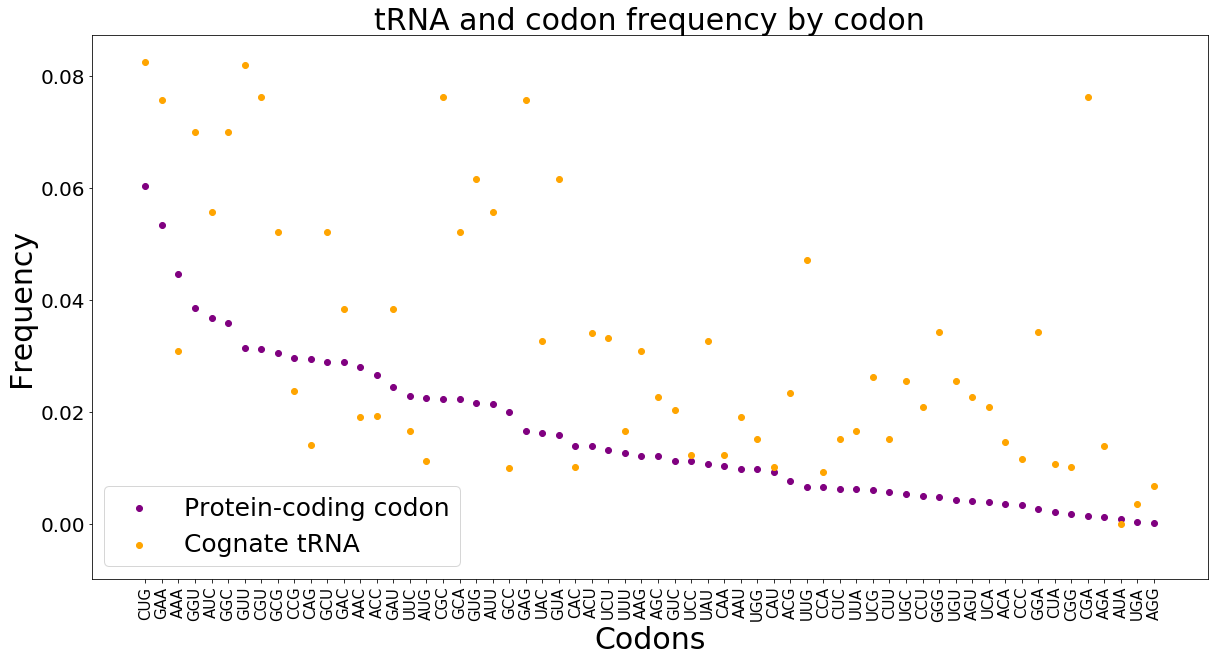

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,10))

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
print(codonp_sorted)

codon_tRNA_sorted_p = [p_codon_tRNA[codon] for codon in codonp_sorted_codon]
codon_time_avg_sorted = [codon_time_avg[codon] for codon in codonp_sorted_codon]
plt.xticks(rotation=90);
#ax2 = ax.twinx()

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=15)

ax.scatter(codonp_sorted_codon,codonp_sorted_p,color='purple',label = 'Protein-coding codon')
ax.scatter(codonp_sorted_codon,codon_tRNA_sorted_p,color='orange',label='Cognate tRNA')
ax.set_xlabel('Codons',fontsize=30)
ax.set_ylabel('Frequency',fontsize=30)
#ax2.scatter(codonp_sorted_codon,codon_time_avg_sorted,color='green')

#ax2.scatter(codonp_sorted_codon,codon_time_avg_sorted,color='green')

ax.legend(fontsize=25)
plt.title("tRNA and codon frequency by codon",fontsize=30)

[0.07859789 0.07122687 0.06213315 0.05569133 0.05399996 0.05289327
 0.04837251 0.0481637  0.0473389  0.04648277 0.04620088 0.04578325
 0.04564753 0.0448436  0.04332972 0.04095972 0.03932055 0.03898646
 0.03886117 0.03873588 0.03797372 0.03795284 0.0362928  0.03291006
 0.03252376 0.03216878 0.03010155 0.03008067 0.02928719 0.02869208
 0.02820137 0.02808653 0.02732437 0.02721996 0.02672925 0.02621767
 0.02580005 0.02576872 0.02520493 0.02343004 0.02247995 0.02236511
 0.02202057 0.02195792 0.0218744  0.02150898 0.02107048 0.02075726
 0.02056933 0.01996378 0.01971321 0.0196088  0.01918074 0.01899281
 0.01836638 0.01778171 0.01736408 0.01691514 0.01670633 0.01649752
 0.0158502  0.01562051]
[0.08240824082408243, 0.07570757075707574, 0.030903090309030913, 0.06990699069906993, 0.055705570557055724, 0.06990699069906993, 0.08190819081908193, 0.07620762076207624, 0.052105210521052124, 0.023702370237023707, 0.014101410141014105, 0.052105210521052124, 0.038403840384038414, 0.019101910191019107, 0.0

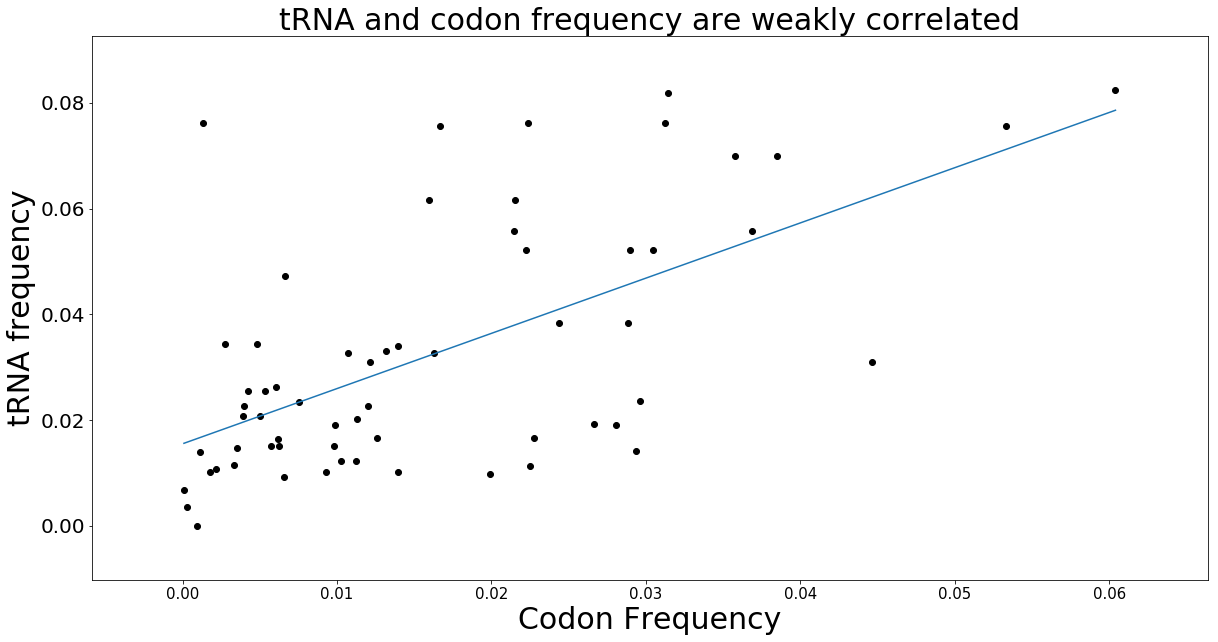

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,10))

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted_p = [p_codon_tRNA[codon] for codon in codonp_sorted_codon]
codon_time_avg_sorted = [codon_time_avg[codon] for codon in codonp_sorted_codon]
#ax2 = ax.twinx()

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=15)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)


plt.title("tRNA and codon frequency are weakly correlated",fontsize=30)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)

    print(SS_err)
    print(SS_tot)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
codon_tRNA_sorted_p = [codon_tRNA_sorted_p_i[0] for codon_tRNA_sorted_p_i in codon_tRNA_sorted_p]
print(y_hat)
print(codon_tRNA_sorted_p)
print(np.average(codon_tRNA_sorted_p))
print(codon_tRNA_sorted_p - np.average(codon_tRNA_sorted_p))
print(codon_tRNA_sorted_p - y_hat)

print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))
ax.plot(x_sweep_i,y_hat_sweep_i)

[('CUG', 0.06041000000000001), ('GAA', 0.053350000000000015), ('AAA', 0.044640000000000006), ('GGU', 0.038470000000000004), ('AUC', 0.03685000000000001), ('GGC', 0.03579000000000001), ('GUU', 0.03146000000000001), ('CGU', 0.03126000000000001), ('GCG', 0.030470000000000007), ('CCG', 0.029650000000000006), ('CAG', 0.029380000000000007), ('GCU', 0.028980000000000006), ('GAC', 0.028850000000000008), ('AAC', 0.028080000000000008), ('ACC', 0.026630000000000008), ('GAU', 0.024360000000000007), ('UUC', 0.022790000000000005), ('AUG', 0.022470000000000004), ('CGC', 0.022350000000000002), ('GCA', 0.022230000000000003), ('GUG', 0.021500000000000002), ('AUU', 0.021480000000000003), ('GCC', 0.019890000000000005), ('GAG', 0.016650000000000005), ('UAC', 0.016280000000000003), ('GUA', 0.015940000000000003), ('CAC', 0.013960000000000004), ('ACU', 0.013940000000000003), ('UCU', 0.013180000000000004), ('UUU', 0.012610000000000003), ('AAG', 0.012140000000000003), ('AGC', 0.012030000000000004), ('GUC', 0.01

TypeError: unhashable type: 'list'

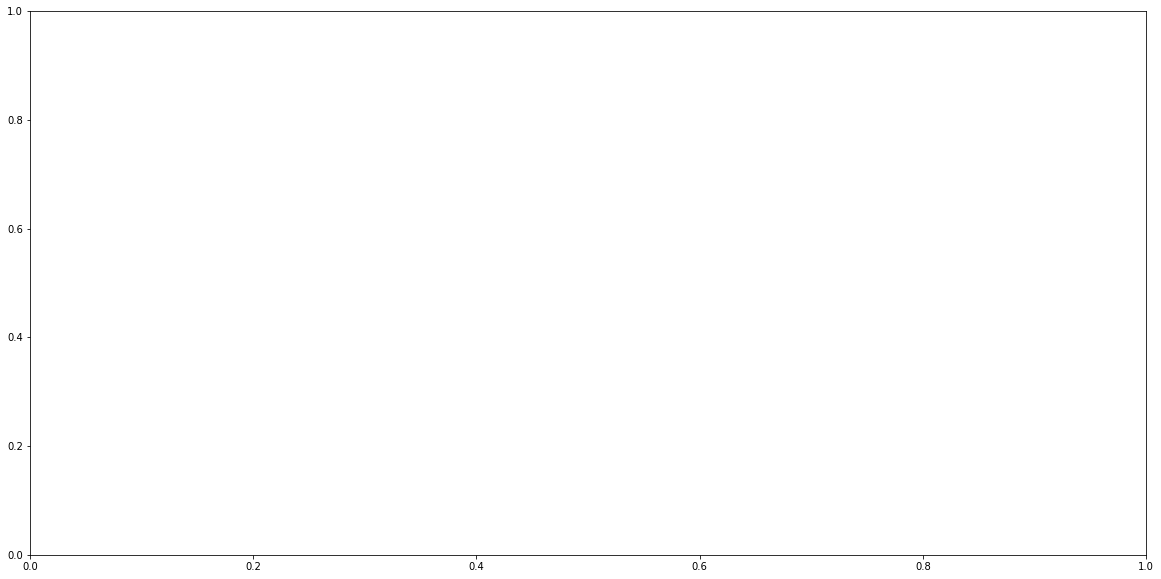

In [470]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,10))

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codonstRNA_sorted = sorted(p_codon_tRNA.items(),key=lambda kv: kv[1])[::-1]
codonstRNA_sorted_codon = [x[0] for x in codonstRNA_sorted]
codonstRNA_sorted_p = [x[1] for x in codonstRNA_sorted]

print(codonp_sorted)

codon_tRNA_sorted_p = [p_codon_tRNA[codon] for codon in codonp_sorted_codon]
codon_time_avg_sorted = [codon_time_avg[codon] for codon in codonstRNA_sorted]
plt.xticks(rotation=90);
#ax2 = ax.twinx()

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=15)

ax.scatter(codonstRNA_sorted,codonp_sorted_p,color='purple',label = 'Protein-coding codon')
ax.scatter(codonstRNA_sorted,codon_tRNA_sorted_p,color='orange',label='Cognate tRNA')
ax.set_xlabel('Codons',fontsize=30)
ax.set_ylabel('Frequency',fontsize=30)
#ax2.scatter(codonp_sorted_codon,codon_time_avg_sorted,color='green')

#ax2.scatter(codonp_sorted_codon,codon_time_avg_sorted,color='green')

ax.legend(fontsize=25)
plt.title("tRNA and codon frequency are correlated",fontsize=30)

[('CUG', 0.06041000000000001), ('GAA', 0.053350000000000015), ('AAA', 0.044640000000000006), ('GGU', 0.038470000000000004), ('AUC', 0.03685000000000001), ('GGC', 0.03579000000000001), ('GUU', 0.03146000000000001), ('CGU', 0.03126000000000001), ('GCG', 0.030470000000000007), ('CCG', 0.029650000000000006), ('CAG', 0.029380000000000007), ('GCU', 0.028980000000000006), ('GAC', 0.028850000000000008), ('AAC', 0.028080000000000008), ('ACC', 0.026630000000000008), ('GAU', 0.024360000000000007), ('UUC', 0.022790000000000005), ('AUG', 0.022470000000000004), ('CGC', 0.022350000000000002), ('GCA', 0.022230000000000003), ('GUG', 0.021500000000000002), ('AUU', 0.021480000000000003), ('GCC', 0.019890000000000005), ('GAG', 0.016650000000000005), ('UAC', 0.016280000000000003), ('GUA', 0.015940000000000003), ('CAC', 0.013960000000000004), ('ACU', 0.013940000000000003), ('UCU', 0.013180000000000004), ('UUU', 0.012610000000000003), ('AAG', 0.012140000000000003), ('AGC', 0.012030000000000004), ('GUC', 0.01

Text(0.5, 1.0, 'Average time to succesful binding increases \nwith decreasing relative tRNA abundance')

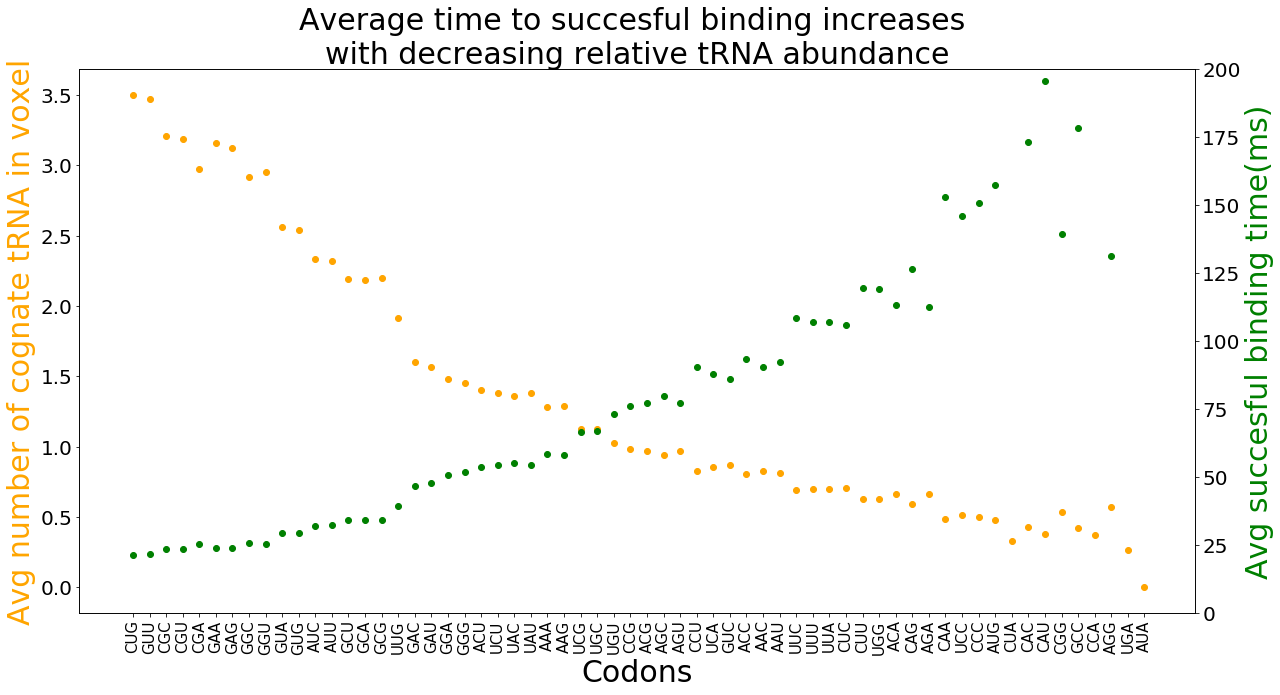

In [518]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,10))
codonstRNA_sorted = sorted(p_codon_tRNA.items(),key=lambda kv: kv[1])[::-1]
codonstRNA_sorted_codon = [x[0] for x in codonstRNA_sorted]
codonstRNA_sorted_p = [x[1] for x in codonstRNA_sorted]

print(codonp_sorted)
codon_tRNA_counts_p = [np.average(np.array((codon_count[codon]))) for codon in codonstRNA_sorted_codon]
codon_tRNA_sorted_p = [p_codon_tRNA[codon] for codon in codonstRNA_sorted_codon]
codon_time_avg_sorted = [codon_time_avg[codon] for codon in codonstRNA_sorted_codon]
codonp_sorted_p = [pcodon_dict[codon[0]] for codon in codonstRNA_sorted]


plt.xticks(rotation=90);
ax2 = ax.twinx()
ax.set_xlabel('Codons',fontsize=30)
ax.tick_params(axis='y', which='major', labelsize=20)
ax2.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=15)

#ax.scatter(codonp_sorted_codon,codonp_sorted_p,color='blue',label='tRNA')
ax.scatter(codonstRNA_sorted_codon,codon_tRNA_counts_p,color='orange',label='tRNA sorted')
ax2.scatter(codonstRNA_sorted_codon,codon_time_avg_sorted,color='green',label='Time until succesful binding')
axlabel = ax.set_ylabel('Avg number of cognate tRNA in voxel',fontsize=30)
axlabel.set_color('orange')

ax.set_xlabel('Codons',fontsize=30)
axlabel2 = ax2.set_ylabel('Avg succesful binding time(ms)',fontsize=30)
axlabel2.set_color('green')

print(np.average((codon_time_avg_sorted)[0:-1]))
plt.ylim(0,200)
plt.title("Average time to succesful binding increases \nwith decreasing relative tRNA abundance",fontsize=30)

[('CUG', 0.06041000000000001), ('GAA', 0.053350000000000015), ('AAA', 0.044640000000000006), ('GGU', 0.038470000000000004), ('AUC', 0.03685000000000001), ('GGC', 0.03579000000000001), ('GUU', 0.03146000000000001), ('CGU', 0.03126000000000001), ('GCG', 0.030470000000000007), ('CCG', 0.029650000000000006), ('CAG', 0.029380000000000007), ('GCU', 0.028980000000000006), ('GAC', 0.028850000000000008), ('AAC', 0.028080000000000008), ('ACC', 0.026630000000000008), ('GAU', 0.024360000000000007), ('UUC', 0.022790000000000005), ('AUG', 0.022470000000000004), ('CGC', 0.022350000000000002), ('GCA', 0.022230000000000003), ('GUG', 0.021500000000000002), ('AUU', 0.021480000000000003), ('GCC', 0.019890000000000005), ('GAG', 0.016650000000000005), ('UAC', 0.016280000000000003), ('GUA', 0.015940000000000003), ('CAC', 0.013960000000000004), ('ACU', 0.013940000000000003), ('UCU', 0.013180000000000004), ('UUU', 0.012610000000000003), ('AAG', 0.012140000000000003), ('AGC', 0.012030000000000004), ('GUC', 0.01

Text(0.5, 1.0, 'Average time to succesful binding decreases \nwith increasing relative tRNA abundance')

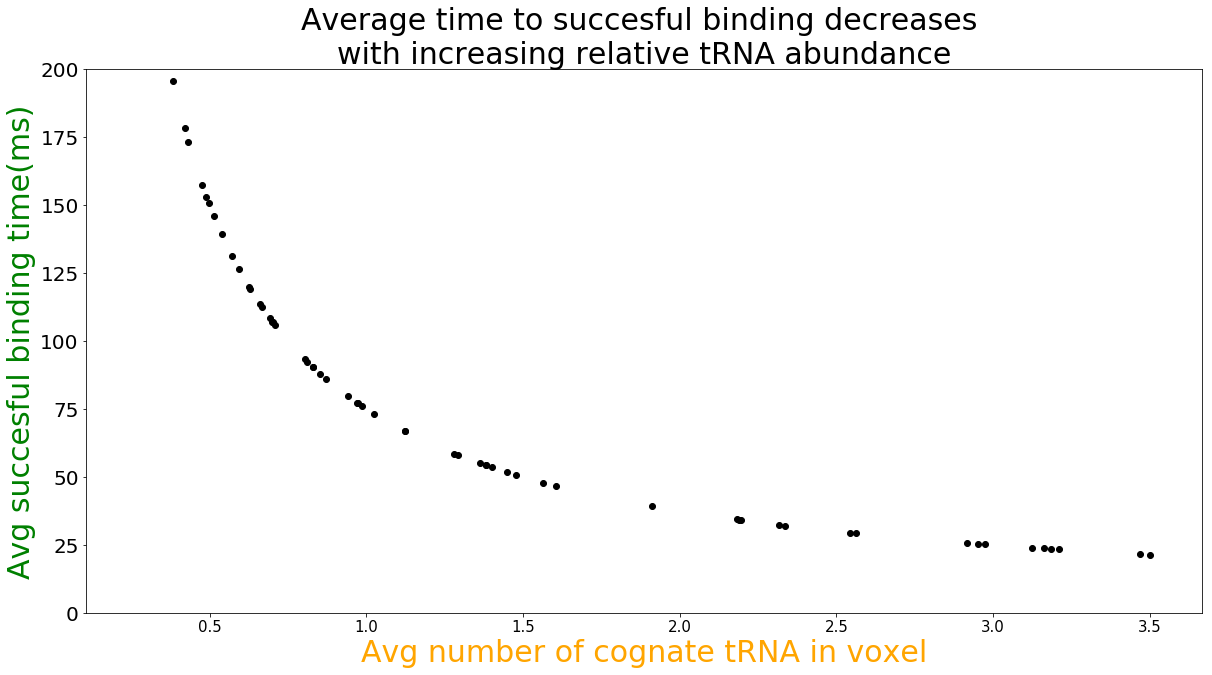

In [517]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,10))
codonstRNA_sorted = sorted(p_codon_tRNA.items(),key=lambda kv: kv[1])[::-1]
codonstRNA_sorted_codon = [x[0] for x in codonstRNA_sorted]
codonstRNA_sorted_p = [x[1] for x in codonstRNA_sorted]

print(codonp_sorted)
codon_tRNA_counts_p = [np.average(np.array((codon_count[codon]))) for codon in codonstRNA_sorted_codon]
codon_tRNA_sorted_p = [p_codon_tRNA[codon] for codon in codonstRNA_sorted_codon]
codon_time_avg_sorted = [codon_time_avg[codon] for codon in codonstRNA_sorted_codon]
codonp_sorted_p = [pcodon_dict[codon[0]] for codon in codonstRNA_sorted]


ax.set_xlabel('Codons',fontsize=30)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=15)


#ax.scatter(codonp_sorted_codon,codonp_sorted_p,color='blue',label='tRNA')
ax.scatter(codon_tRNA_counts_p,codon_time_avg_sorted,color='black',label='tRNA sorted')
axlabel = ax.set_ylabel('Avg succesful binding time(ms)',fontsize=30)
axlabel.set_color('green')
ax.set_xlabel('Avg number of cognate tRNA in voxel', color='orange',fontsize=30)


print(np.average((codon_time_avg_sorted)[0:-1]))
plt.ylim(0,200)
plt.title("Average time to succesful binding decreases \nwith increasing relative tRNA abundance",fontsize=30)

[('CUG', 0.06041000000000001), ('GAA', 0.053350000000000015), ('AAA', 0.044640000000000006), ('GGU', 0.038470000000000004), ('AUC', 0.03685000000000001), ('GGC', 0.03579000000000001), ('GUU', 0.03146000000000001), ('CGU', 0.03126000000000001), ('GCG', 0.030470000000000007), ('CCG', 0.029650000000000006), ('CAG', 0.029380000000000007), ('GCU', 0.028980000000000006), ('GAC', 0.028850000000000008), ('AAC', 0.028080000000000008), ('ACC', 0.026630000000000008), ('GAU', 0.024360000000000007), ('UUC', 0.022790000000000005), ('AUG', 0.022470000000000004), ('CGC', 0.022350000000000002), ('GCA', 0.022230000000000003), ('GUG', 0.021500000000000002), ('AUU', 0.021480000000000003), ('GCC', 0.019890000000000005), ('GAG', 0.016650000000000005), ('UAC', 0.016280000000000003), ('GUA', 0.015940000000000003), ('CAC', 0.013960000000000004), ('ACU', 0.013940000000000003), ('UCU', 0.013180000000000004), ('UUU', 0.012610000000000003), ('AAG', 0.012140000000000003), ('AGC', 0.012030000000000004), ('GUC', 0.01

Text(0.5, 1.0, 'Average time to succesful binding increases to a lower max w/ decreasing tRNA abundance \nwhen only voxels with 1 or more cognate tRNA are considered')

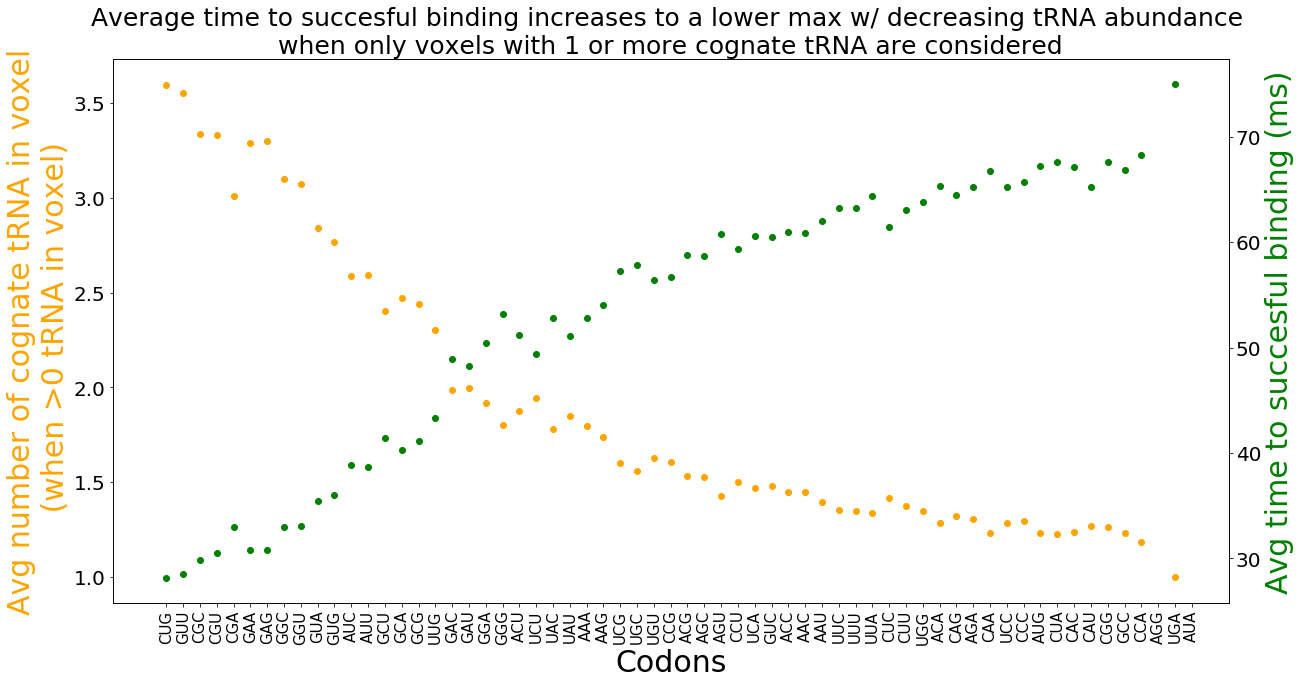

In [521]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,10))
codonstRNA_sorted = sorted(p_codon_tRNA.items(),key=lambda kv: kv[1])[::-1]
codonstRNA_sorted_codon = [x[0] for x in codonstRNA_sorted]
codonstRNA_sorted_p = [x[1] for x in codonstRNA_sorted]

print(codonp_sorted)
codon_tRNA_counts_p = [np.average(np.array((codon_count[codon]))[np.array((codon_count[codon]))!=0]) for codon in codonstRNA_sorted_codon]
codon_tRNA_sorted_p = [p_codon_tRNA[codon] for codon in codonstRNA_sorted_codon]
codon_time_avg_sorted = [codon_time_avg[codon] for codon in codonstRNA_sorted_codon]
codonp_sorted_p = [pcodon_dict[codon[0]] for codon in codonstRNA_sorted]


plt.xticks(rotation=90);
ax2 = ax.twinx()


ax.set_xlabel('Codons',fontsize=30)
ax.tick_params(axis='y', which='major', labelsize=20)
ax2.tick_params(axis='y', which='major', labelsize=20)
ax.tick_para
ms(axis='x', which='major', labelsize=15)


#ax.scatter(codonp_sorted_codon,codonp_sorted_p,color='blue',label='tRNA')
ax.scatter(codonstRNA_sorted_codon,codon_tRNA_counts_p,color='orange',label='tRNA sorted')
axlabel = ax.set_ylabel('Avg number of cognate tRNA in voxel\n (when >0 tRNA in voxel)',fontsize=30)
axlabel.set_color('orange')

ax2.scatter(codonstRNA_sorted_codon,codon_time_avg_sorted,color='green',label='Time until succesful binding')
ax2label = ax2.set_ylabel('Avg time to succesful binding (ms)',fontsize=30)
ax2label.set_color('green')

print(np.nanmean(codon_time_avg_sorted))
plt.title("Average time to succesful binding increases to a lower max w/ decreasing tRNA abundance \nwhen only voxels with 1 or more cognate tRNA are considered",fontsize=25)

[('CUG', 0.06041000000000001), ('GAA', 0.053350000000000015), ('AAA', 0.044640000000000006), ('GGU', 0.038470000000000004), ('AUC', 0.03685000000000001), ('GGC', 0.03579000000000001), ('GUU', 0.03146000000000001), ('CGU', 0.03126000000000001), ('GCG', 0.030470000000000007), ('CCG', 0.029650000000000006), ('CAG', 0.029380000000000007), ('GCU', 0.028980000000000006), ('GAC', 0.028850000000000008), ('AAC', 0.028080000000000008), ('ACC', 0.026630000000000008), ('GAU', 0.024360000000000007), ('UUC', 0.022790000000000005), ('AUG', 0.022470000000000004), ('CGC', 0.022350000000000002), ('GCA', 0.022230000000000003), ('GUG', 0.021500000000000002), ('AUU', 0.021480000000000003), ('GCC', 0.019890000000000005), ('GAG', 0.016650000000000005), ('UAC', 0.016280000000000003), ('GUA', 0.015940000000000003), ('CAC', 0.013960000000000004), ('ACU', 0.013940000000000003), ('UCU', 0.013180000000000004), ('UUU', 0.012610000000000003), ('AAG', 0.012140000000000003), ('AGC', 0.012030000000000004), ('GUC', 0.01

Text(0.5, 1.0, 'Average succesful time scales ~linearly when \n only voxels with 1 or more cognate tRNA are considered')

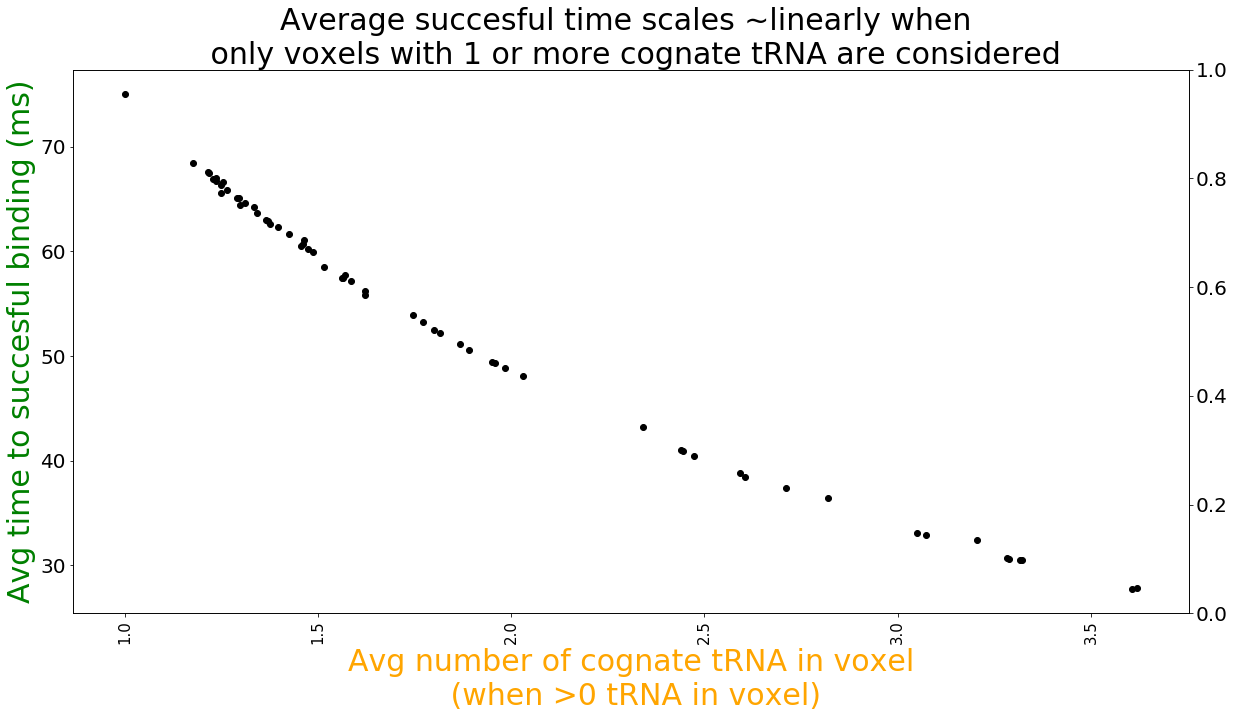

In [513]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,10))
codonstRNA_sorted = sorted(p_codon_tRNA.items(),key=lambda kv: kv[1])[::-1]
codonstRNA_sorted_codon = [x[0] for x in codonstRNA_sorted]
codonstRNA_sorted_p = [x[1] for x in codonstRNA_sorted]

print(codonp_sorted)
codon_tRNA_counts_p = [np.average(np.array((codon_count[codon]))[np.array((codon_count[codon]))!=0]) for codon in codonstRNA_sorted_codon]
codon_tRNA_sorted_p = [p_codon_tRNA[codon] for codon in codonstRNA_sorted_codon]
codon_time_avg_sorted = [codon_time_avg[codon] for codon in codonstRNA_sorted_codon]
codonp_sorted_p = [pcodon_dict[codon[0]] for codon in codonstRNA_sorted]


plt.xticks(rotation=90);
ax2 = ax.twinx()


ax.set_xlabel('Avg number of cognate tRNA in voxel\n (when >0 tRNA in voxel)',color='orange',fontsize=30)
ax.tick_params(axis='y', which='major', labelsize=20)
ax2.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=15)

#ax.scatter(codonp_sorted_codon,codonp_sorted_p,color='blue',label='tRNA')
ax.scatter(codon_tRNA_counts_p, codon_time_avg_sorted,color='black',label='tRNA sorted')
axlabel = ax.set_ylabel('Avg time to succesful binding (ms)',fontsize=30)
axlabel.set_color('green')

print(np.nanmean(codon_time_avg_sorted))
plt.title("Average succesful time scales ~linearly when \n only voxels with 1 or more cognate tRNA are considered",fontsize=30)

In [127]:
print(codon_tRNA_sorted_p)

[1.5881753312945974, 1.6105577689243027, 1.618860510805501, 1.5894105894105894, 1.621840242669363, 1.5625635808748728, 1.6703517587939698, 1.5892323030907278, 1.637214137214137, 1.6052899287894202, 2.4514672686230248, 1.6238716148445336, 1.5841300191204588, 1.592979127134725, 1.6162790697674418, 1.572700296735905, 1.5974903474903475, 1.6070726915520628, 1.600206611570248, 1.575, 1.6195028680688337, 1.6257606490872212, 1.611328125, 1.5972629521016617, 1.6235521235521235, nan, 1.5947916666666666, 1.5978578383641675, 2.3153678077203206, 1.6232604373757455, 3.2404298186702487, 2.3099203475742214, 1.608875128998968, 1.6448243114909782, 1.616850551654965, 1.609950248756219, 1.6419125127161749, 1.6415094339622642, 2.401689708141321, 1.5741869918699187, 1.6220238095238095, 1.6137724550898203, 2.3555555555555556, 1.5841784989858012, 2.3501110288675053, 1.633552014995314, 1.6175298804780875, 1.641260162601626, 1.591578947368421, 1.5795228628230615, 1.631525076765609, 1.5498046875, 1.588846880907

In [524]:
cells = 1
TU = 9500
time = 75
tRNA_distrib_arr = list()
codon_count = {}
codon_time = {}
codon_time_avg = {}
codon_time_weighted_avg={}
p_codon_tRNA = {}
for key in codon_dict:
    codon_count[key] = []
    codon_time[key] = []
    codon_time_avg[key] = []
    codon_time_weighted_avg[key]=[]
    p_codon_tRNA[key] = []
    
for codon in codon_dict:
    p_codon_tRNA_i = 0
    for tRNA in codon_dict[codon]:
        p_codon_tRNA_i += ptRNA_dict[tRNA]
    p_codon_tRNA[codon].append(p_codon_tRNA_i)

for cell in range(cells):
    for i in range(TU):
        tRNA_vox = list(np.random.choice(tRNA_tags,42,p=ptRNA))
        codon_vox = np.random.choice(codons_Ec, 1, p=pcodons_Ec)
        codon_count_i = 0
        for tRNA in codon_dict[codon_vox[0]]:
            codon_count_i += tRNA_vox.count(tRNA)
        codon_count[codon_vox[0]].append(codon_count_i)

    for codon in codon_count:
        #for codon_count_i in codon_count[codon]:
         #   if codon_count_i != 0:
          #      codon_time[codon].append(time/codon_count_i)
          #  else:
           #     codon_time[codon].append(np.nan)
            
        #codon_time_avg[codon].append(np.nanmean(codon_time[codon]))
        #codon_time_weighted_avg[codon].append(pcodon_dict[codon]*np.nanmean(codon_time[codon]))
        codon_time_avg[codon].append(time/(np.average(codon_count[codon])))
        codon_time_weighted_avg[codon].append(pcodon_dict[codon]*(time/np.average(codon_count[codon])))

    print(codon_time_avg)

    print(np.nanmean((np.array(list(codon_time_avg.values())).flatten())))
    print(np.nansum((np.array(list(codon_time_weighted_avg.values())).flatten())))

print((sorted((list(codon_time_avg.values())))))

{'GGG': [50.806451612903224], 'GGA': [61.36363636363636], 'GGU': [25.481611208406303], 'GGC': [24.63872832369942], 'GAG': [23.847926267281103], 'GAA': [24.39528962444303], 'GAU': [43.84920634920635], 'GAC': [46.58071748878924], 'GUG': [31.36094674556213], 'GUA': [29.364089775561098], 'GUU': [22.607655502392344], 'GUC': [88.71951219512195], 'GCG': [35.86363636363637], 'GCA': [34.285714285714285], 'GCU': [36.01036269430052], 'GCC': [203.38983050847457], 'AGG': [inf], 'AGA': [137.5], 'AGU': [78.4090909090909], 'AGC': [75.64102564102564], 'AAG': [49.73262032085562], 'AAA': [55.96590909090909], 'AAU': [102.8225806451613], 'AAC': [89.74358974358974], 'AUG': [159.0], 'AUA': [inf], 'AUU': [30.390334572490705], 'AUC': [33.6241610738255], 'ACG': [92.41071428571428], 'ACA': [161.53846153846152], 'ACU': [53.75], 'ACC': [95.79207920792079], 'UGG': [130.26315789473682], 'UGA': [inf], 'UGU': [56.25], 'UGC': [54.92957746478873], 'UAU': [47.43975903614458], 'UAC': [53.46534653465347], 'UUG': [36.413043

/Users/Akshay/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Akshay/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:44: RuntimeWarning: divide by zero encountered in double_scalars
